In [24]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,KFold, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sdg_index_2000-2022.csv")
df

,country_code,country,year,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,...,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score,sdg_index_score
0,AFG,Afghanistan,2000,28.8,27.3,19.2,1.6,20.8,32.4,21.0,...,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,36.0
1,AFG,Afghanistan,2001,28.8,30.6,19.4,1.6,20.8,32.4,22.3,...,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,36.3
2,AFG,Afghanistan,2002,28.8,30.7,19.7,1.6,20.8,32.7,21.5,...,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,36.3
3,AFG,Afghanistan,2003,28.8,32.5,19.9,1.6,20.8,33.0,24.5,...,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,36.7
4,AFG,Afghanistan,2004,28.8,32.1,21.1,1.6,20.8,33.3,28.0,...,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,37.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,ZWE,Zimbabwe,2018,26.4,46.6,39.8,57.9,76.7,51.6,40.6,...,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6,55.9
4136,ZWE,Zimbabwe,2019,21.4,46.0,40.6,60.6,77.0,51.3,39.9,...,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5,53.7
4137,ZWE,Zimbabwe,2020,20.1,47.2,41.5,62.0,77.0,51.1,41.6,...,25.4,24.0,60.0,94.6,94.3,0.0,76.4,44.6,46.0,54.3
4138,ZWE,Zimbabwe,2021,20.8,48.4,41.9,62.5,77.1,51.1,41.6,...,27.0,24.0,61.2,94.5,94.3,0.0,77.9,43.1,48.1,54.8


# Column names and descriptions

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   object 
 1   country          4140 non-null   object 
 2   year             4140 non-null   int64  
 3   goal_1_score     4140 non-null   float64
 4   goal_2_score     4140 non-null   float64
 5   goal_3_score     4140 non-null   float64
 6   goal_4_score     4140 non-null   float64
 7   goal_5_score     4140 non-null   float64
 8   goal_6_score     4140 non-null   float64
 9   goal_7_score     4140 non-null   float64
 10  goal_8_score     4140 non-null   float64
 11  goal_9_score     4140 non-null   float64
 12  goal_10_score    4140 non-null   float64
 13  goal_11_score    4140 non-null   float64
 14  goal_12_score    4140 non-null   float64
 15  goal_13_score    4140 non-null   float64
 16  goal_14_score    4140 non-null   float64
 17  goal_15_score 

In [4]:
df.isnull().sum()

country_code       0
country            0
year               0
goal_1_score       0
goal_2_score       0
goal_3_score       0
goal_4_score       0
goal_5_score       0
goal_6_score       0
goal_7_score       0
goal_8_score       0
goal_9_score       0
goal_10_score      0
goal_11_score      0
goal_12_score      0
goal_13_score      0
goal_14_score      0
goal_15_score      0
goal_16_score      0
goal_17_score      0
sdg_index_score    0
dtype: int64

# Exploratory Data Analysis (EDA)

************************************************************************************************************************
				**************ANALYSIS***************

~~ 1)Finland and Sweden Highest Overall score in overall SDG. 2)South Sudan is lowest in overall score of SDG.
************************************************************************************************************************


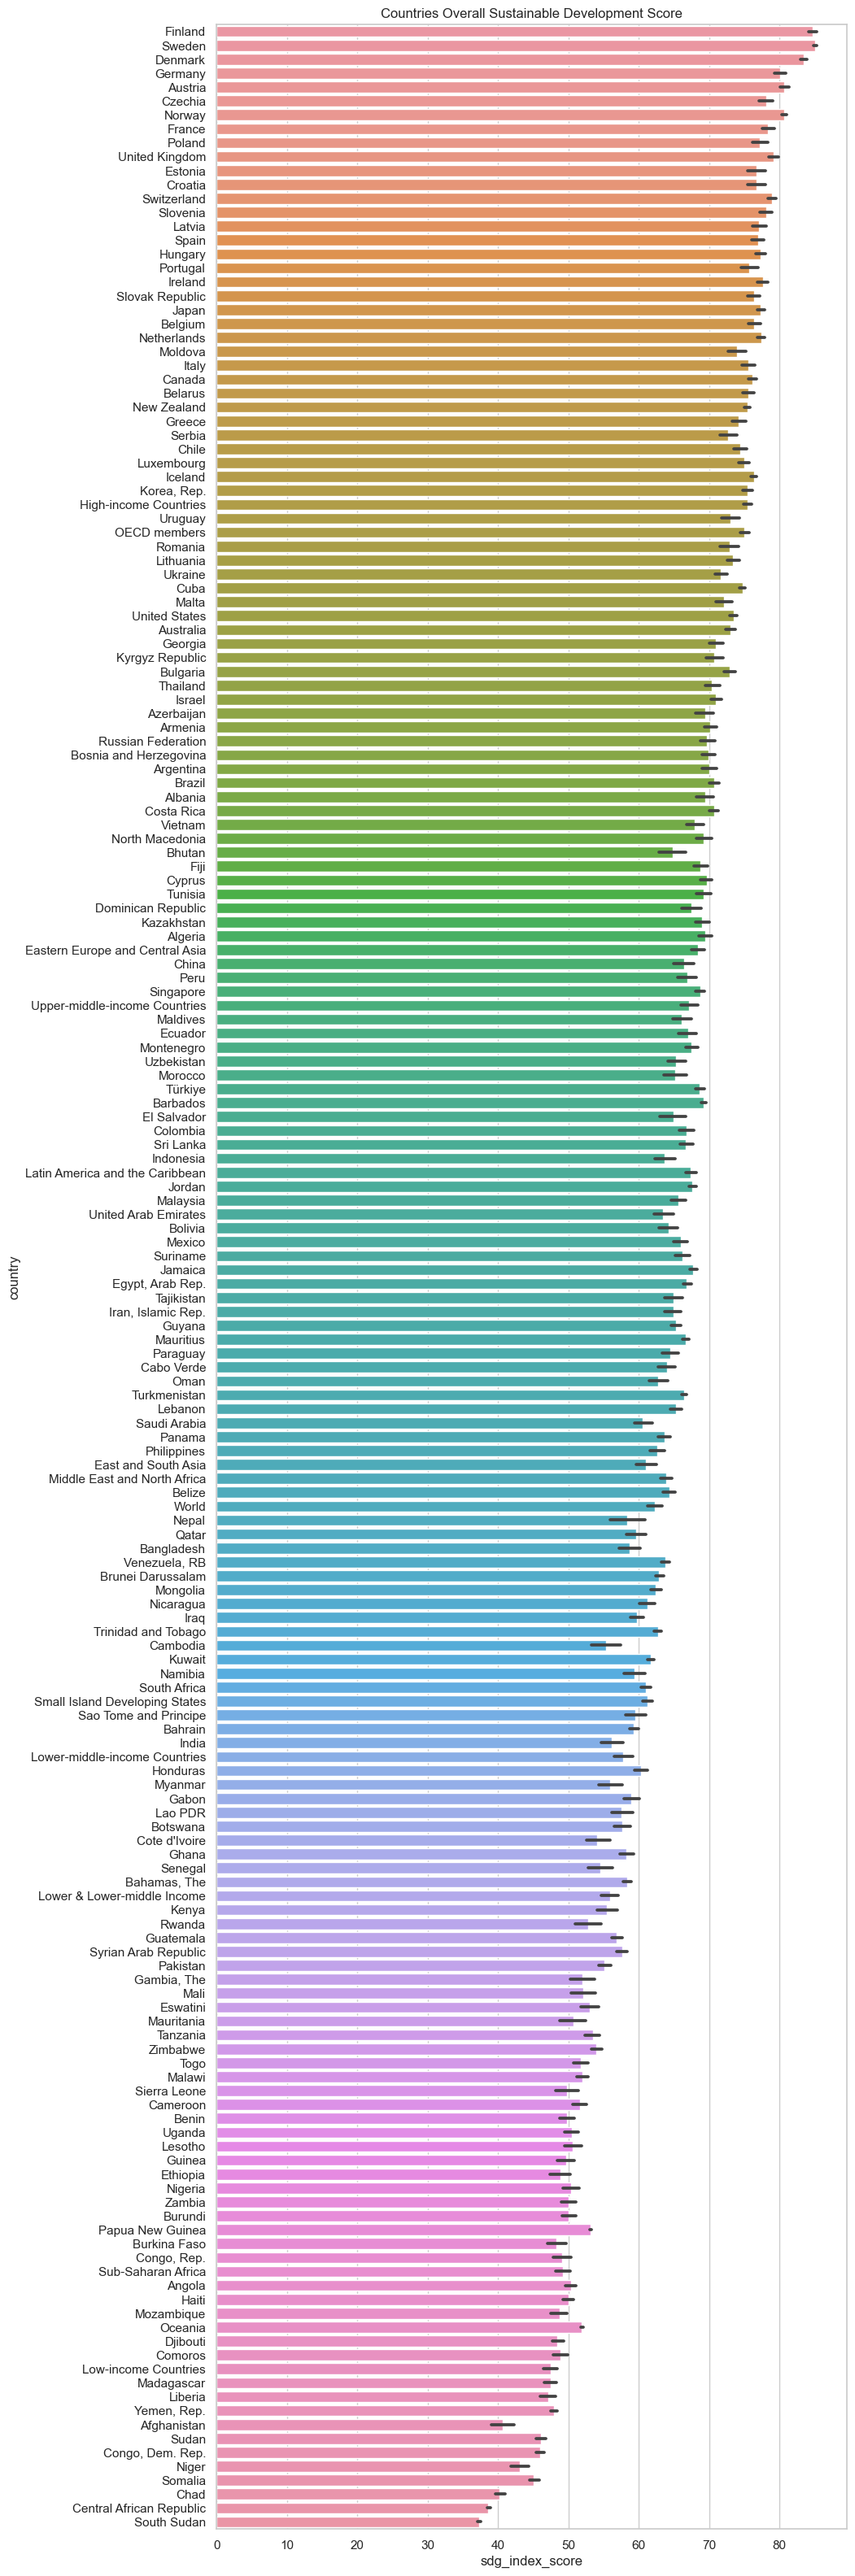

In [5]:
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n~~ 1)Finland and Sweden Highest Overall score in overall SDG. 2)South Sudan is lowest in overall score of SDG.") 
print(("*")*120)
plt.figure(figsize = (10,40))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(data = df.sort_values(by = 'sdg_index_score', ascending = False), x = 'sdg_index_score', y = 'country')
plt.title('Countries Overall Sustainable Development Score')
plt.show()

# Split dataset

In [43]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
linreg = lm.LinearRegression()
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [60]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}
   

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)



In [61]:
linear_reg(x,y)

{'copy_X': True, 'fit_intercept': True}
-1.683280356121474


In [55]:
### Ridge Regression ###

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1000])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)
    
ridge_reg(x, y)

{'alpha': 1000.0}
-1.6797784047222777


In [65]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1000])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)
    
lasso_reg(x,y) 

{'alpha': 0.1}
-1.679020249990169


In [64]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1000])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)
    
elastic_reg(x, y)

{'alpha': 1.0}
-1.6801391768858842


In [45]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(xtrain)
X_test = Poly.fit_transform(xtest)

In [66]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True)
lr.fit(X_train, ytrain)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 1000)
ridge_model.fit(X_train, ytrain)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.1)
Lasso_model.fit(X_train, ytrain)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 1.0)
model_enet.fit(X_train, ytrain) 
pred_test_enet= model_enet.predict(X_test)

In [67]:
print('-------------Lineer Regression-----------')

print('MAE: %f'% mean_absolute_error(ytest, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(ytest, lr_pred)))   
print('R2 %f' % r2_score(ytest, lr_pred))

print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(ytest, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(ytest, pred_ridge)))   
print('R2 %f' % r2_score(ytest, pred_ridge))

print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(ytest, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(ytest, pred_Lasso)))
print('R2 %f' % r2_score(ytest, pred_Lasso))

print('---------------ElasticNet-------------------')

print('MAE: %f' % mean_absolute_error(ytest,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(ytest,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(ytest, pred_test_enet))

-------------Lineer Regression-----------
MAE: 0.449444
RMSE: 0.589586
R2 0.996940
---------------Ridge ---------------------
MAE: 0.462797
RMSE: 0.603696
R2 0.996792
---------------Lasso-----------------------
MAE: 0.484652
RMSE: 0.629469
R2 0.996512
---------------ElasticNet-------------------
MAE: 0.539638
RMSE: 0.685610
R2 0.995862
